In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
input_shape = (28,28,1)

In [4]:
#Making sure the values that are float so that we can get decimal point
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

#Normalizing the RGB codes by dividing it to max RGB value
x_train = x_train/255
x_test = x_test/255

print("Shape of Training :",x_train.shape)
print("Shape of Testing :",x_test.shape)


Shape of Training : (60000, 28, 28, 1)
Shape of Testing : (10000, 28, 28, 1)


In [5]:
#DEFINING MODEL"S ARCHITECTURE

model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))

model.summary()

C:\Users\Acer\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4732)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       946,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 948,890 (3.62 MB)

 Trainable params: 948,890 (3.62 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#TRAINING THE MODEL
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.9377 - loss: 0.2031
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9744 - loss: 0.0842


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9808 - loss: 0.0592
Loss=0.059
Accuracy=0.981


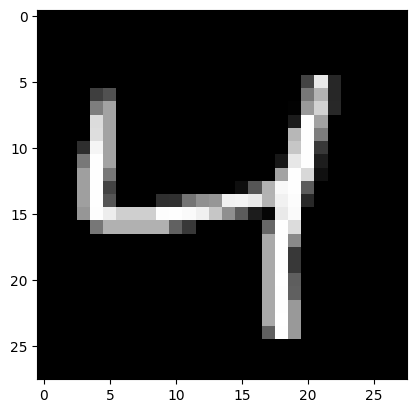

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predicted class : 4


C:\Users\Acer\anaconda3\envs\tf_env\lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 28, 28, 1))',)
  warnings.warn(msg)


In [7]:
#ESTIMATING MODEL's PERFORMANCE

test_loss, test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

#SHOWING IMAGE AT POSITION[0] from dataset
image = x_train[2]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

#PREDICTING CLASS IMAGE
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
predict_model = model.predict([image])
print("Predicted class :",predict_model.argmax())
